## **CNN with MNIST Data**

In [1]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt               
%matplotlib inline

In [2]:
from tensorflow.keras.datasets.mnist import load_data    # To load the MNIST digit dataset

(X_train, y_train) , (X_test, y_test) = load_data()      # Loading data

In [3]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [4]:
# Checking the shape of one image
X_train[5].shape

(28, 28)

In [5]:
X_train[5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  13,  25, 100, 122,   7,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [6]:
X_train[5].shape

(28, 28)

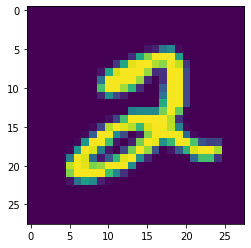

In [7]:
plt.imshow(X_train[5])
# plt.matshow(X_train[5])

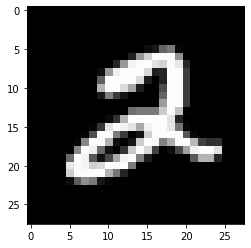

In [8]:
plt.imshow(X_train[5], cmap=plt.get_cmap('gray'));

In [9]:
y_train[5]

2

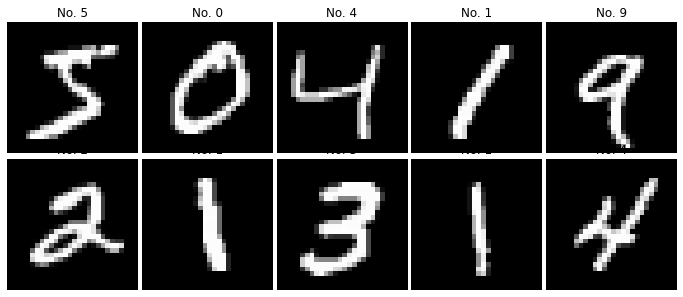

In [10]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.01}, 
                     squeeze=True)
image_index_list = []
for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        image_index_list.append(image_index )
        ax[r,c].axis("off")
        ax[r,c].imshow( X_train[image_index], cmap='gray')
        ax[r,c].set_title('No. %d' % y_train[image_index])
plt.show()
plt.close()

In [11]:
image_index_list

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [12]:
for i in image_index_list:
    print(y_train[i])

5
0
4
1
9
2
1
3
1
4


## Data Preprocessing

In [13]:
X_train[5].min()

0

In [14]:
X_train[5].max()

255

In [15]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [16]:
X_train[5]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [17]:
pd.DataFrame(X_train[5])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.478431,0.027451,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.988235,0.572549,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.988235,0.909804,0.156863,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.058824,...,0.988235,0.988235,0.235294,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.376471,...,0.988235,0.988235,0.235294,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [78]:
X_train[5].min()

0.0

In [79]:
X_train[5].max()

1.0

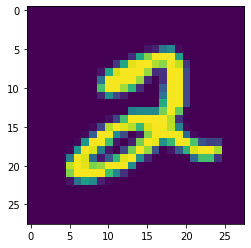

In [80]:
plt.imshow(X_train[5]);

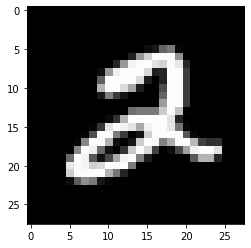

In [81]:
plt.imshow(X_train[5], cmap=plt.get_cmap('gray'));

In [82]:
X_train.shape[0]

60000

In [83]:
for i in range(0, 10):
    print(X_train[i].shape)

(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)


In [84]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [85]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [86]:
y_train[:15]
# burdaki rakamlar bildigin rakamlar ancak class haline donusturulmeli

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1], dtype=uint8)

In [87]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [88]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [89]:
from tensorflow.keras.utils import to_categorical

In [100]:
Y_train = to_categorical(y_train,10) 
Y_test = to_categorical(y_test,10)
Y_test.shape

(10000, 10)

In [101]:
Y_train.shape

(60000, 10)

In [102]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [103]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [105]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2)))  # stride=2 (kaydirma), padding='valid' or 'same'

model.add(Flatten())

model.add(Dense(128, activation='relu'))  # hidden layer

model.add(Dense(10, activation='softmax'))  # output layer

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

**A sample example showing the conversion of 3D data to 2D**
![3Dto2D](https://dphi-courses.s3.ap-south-1.amazonaws.com/Deep+Learning+Bootcamp/3D+to++2D.png)

In [106]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [107]:
from tensorflow.keras.callbacks import EarlyStopping

In [108]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test),callbacks=[early_stop])


Epoch 1/10
1875/1875 [==============================] - 67s 35ms/step - loss: 0.1594 - accuracy: 0.9525 - val_loss: 0.0675 - val_accuracy: 0.9772
Epoch 2/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0519 - accuracy: 0.9843 - val_loss: 0.0534 - val_accuracy: 0.9827
Epoch 3/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0344 - accuracy: 0.9895 - val_loss: 0.0462 - val_accuracy: 0.9846
Epoch 4/10
1658/1875 [=========================>....] - ETA: 6s - loss: 0.0215 - accuracy: 0.9930

In [45]:
model.metrics_names

['loss', 'accuracy']

In [46]:
model.history.history

{'loss': [0.15556131303310394,
  0.05379437655210495,
  0.03430571034550667,
  0.02265118435025215,
  0.015073687769472599],
 'accuracy': [0.9532833099365234,
  0.9829833507537842,
  0.9888833165168762,
  0.9929333329200745,
  0.9951333403587341],
 'val_loss': [0.06757543981075287,
  0.048910968005657196,
  0.04000789672136307,
  0.04233087971806526,
  0.04936718940734863],
 'val_accuracy': [0.9790999889373779,
  0.9837999939918518,
  0.986299991607666,
  0.9865000247955322,
  0.9847999811172485]}

In [54]:
summary.nlargest(5, 'val_accuracy')

,loss,accuracy,val_loss,val_accuracy
3,0.022651,0.992933,0.042331,0.9865
2,0.034306,0.988883,0.040008,0.9863
4,0.015074,0.995133,0.049367,0.9848
1,0.053794,0.982983,0.048911,0.9838
0,0.155561,0.953283,0.067575,0.9791


In [51]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.155561,0.953283,0.067575,0.9791
1,0.053794,0.982983,0.048911,0.9838
2,0.034306,0.988883,0.040008,0.9863
3,0.022651,0.992933,0.042331,0.9865
4,0.015074,0.995133,0.049367,0.9848


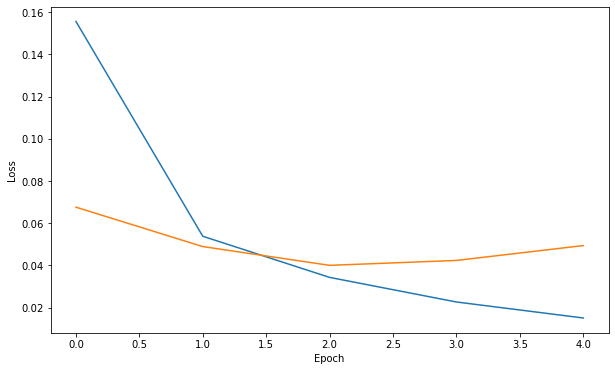

In [58]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss)
plt.plot(summary.val_loss)
plt.ylabel("Loss")
plt.xlabel("Epoch");

Text(0.5, 0, 'Epoch')

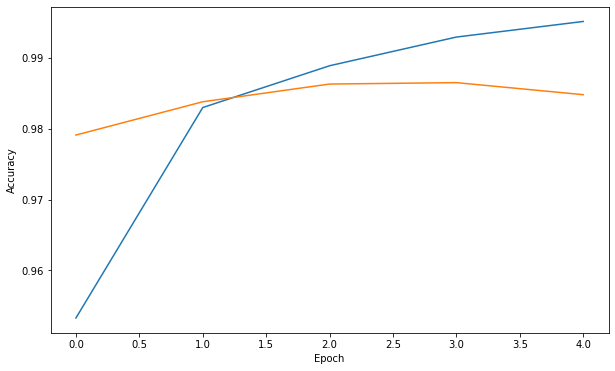

In [59]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy)
plt.plot(summary.val_accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Epoch")

In [60]:
print(model.evaluate(X_test,Y_test,verbose=1))

313/313 [==============================] - 4s 12ms/step - loss: 0.0494 - accuracy: 0.9848
[0.04936718940734863, 0.9847999811172485]


In [61]:
from sklearn.metrics import classification_report,confusion_matrix

In [63]:
preds = model.predict(X_test)

In [64]:
preds

array([[8.4322105e-11, 1.3811012e-08, 2.4222965e-07, ..., 9.9999976e-01,
        3.3640712e-11, 3.6859127e-10],
       [1.5554744e-07, 1.5510697e-06, 9.9999630e-01, ..., 1.0394932e-10,
        5.2701115e-09, 9.6357332e-11],
       [6.1504215e-06, 9.9993527e-01, 7.5867865e-06, ..., 4.4472428e-05,
        4.5227316e-06, 2.1552106e-07],
       ...,
       [1.4571145e-13, 2.0166534e-10, 4.7605236e-12, ..., 8.1048732e-09,
        5.5941385e-08, 9.9579374e-08],
       [7.3471469e-09, 1.3220621e-11, 2.3607771e-10, ..., 1.1650350e-10,
        1.4426811e-04, 5.0923470e-09],
       [9.6760555e-13, 7.2123324e-14, 6.8958203e-12, ..., 4.4981933e-18,
        1.7888555e-10, 3.1403309e-13]], dtype=float32)

In [68]:
predictions= np.argmax(preds, axis=1)

In [66]:
len(preds)

10000

In [69]:
len(predictions)

10000

In [70]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       1.00      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.97      0.99      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [71]:
print(confusion_matrix(y_test, predictions))

[[ 975    0    1    0    1    0    2    1    0    0]
 [   1 1124    2    0    0    0    6    0    2    0]
 [   1    1 1024    0    1    0    1    4    0    0]
 [   0    0    3  990    0    7    2    3    3    2]
 [   0    0    0    0  968    0    5    0    1    8]
 [   1    0    1    2    0  882    5    0    1    0]
 [   3    2    1    0    1    1  949    0    1    0]
 [   1    2   12    0    0    0    0 1011    1    1]
 [   5    1    5    0    3    3    4    3  945    5]
 [   1    3    0    2    8    4    0    7    4  980]]


In [72]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04936718940734863
Test accuracy: 0.9847999811172485


In [73]:
my_number = X_test[0]

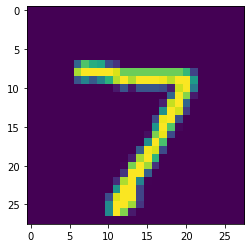

In [74]:
plt.imshow(my_number.reshape(28,28))

In [75]:
model.predict(my_number.reshape(1,28,28,1))

array([[8.4322105e-11, 1.3811012e-08, 2.4222965e-07, 7.1950370e-09,
        6.8085093e-10, 6.0204782e-13, 8.3796732e-14, 9.9999976e-01,
        3.3640712e-11, 3.6859127e-10]], dtype=float32)

In [77]:
# SHAPE --> (num_images,width,height,color_channels)
np.argmax(model.predict(my_number.reshape(1,28,28,1)), axis=1)

array([7], dtype=int64)

In [78]:
model.save("cnn-1.h5")